# Multilingual Text Dataset



In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import keras
from keras.models import Sequential
from keras import layers
from keras.layers import GRU,Dropout,BatchNormalization




%matplotlib inline 

Using TensorFlow backend.


**Create a dataframe**

In [2]:
dataset = pd.read_csv('data/dataset.csv', sep='\t', header=None).applymap(str)

**List all languages that are exist in the dataset**

In [3]:
languages = dataset[dataset.columns[0]].unique()
languages

array(['english', 'albanian', 'arabic', 'bulgarian', 'chinese',
       'croatian', 'czech', 'danish', 'dutch', 'estonian', 'finnish',
       'french', 'german', 'greek', 'hebrew', 'hungarian', 'icelandic',
       'italian', 'japanese', 'korean', 'lithuanian', 'norwegian',
       'polish', 'portuguese', 'romanian', 'russian', 'serbian',
       'slovenian', 'spanish', 'swedish', 'turkish', 'ukrainian'],
      dtype=object)

**List all labels (categories)**

In [4]:
categories = dataset[dataset.columns[1]].unique()
categories

array(['advertising', 'agriculture', 'animation', 'arts_and_crafts',
       'entertainment', 'astrology', 'vehicles', 'games',
       'books_and_literature', 'business', 'gambling', 'jobs', 'clothing',
       'comic_books', 'dating', 'education', 'adult', 'food', 'health',
       'hobbies_and_interests', 'humor', 'illegal_content', 'investing',
       'jewelry', 'logistics', 'marketing', 'movies', 'music', 'hacking',
       'media', 'finance', 'pets', 'politics', 'religion',
       'sci_fi_and_fantasy', 'science', 'shopping', 'society', 'sports',
       'tech', 'teens', 'television', 'travel', 'under_construction',
       'weather'], dtype=object)

In [5]:
# Rename Dataset Columns
dataset.columns = ["Language","Label","Text"]
dataset.head()


,Language,Label,Text
0,english,advertising,Exclusive: U.S. government seeks Facebook help...
1,english,advertising,Trump asks SEC to mull half-year corporate fil...
2,english,advertising,"Wall St. up on trade hopes, S&P equals longest..."
3,english,advertising,"Asian shares hit one-year low on Turkey, China..."
4,english,advertising,"Asian stocks weaken as Turkey worries weigh, d..."


In [6]:
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["Label"])

In [7]:
Sentences = dataset.Text
y = dataset.Label

In [8]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   Sentences, y, test_size=0.25, random_state=1000)

In [9]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [10]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [11]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print(X_train[0, :])


[  89    2  649   21   43 2584    2  292   21    2  624  292    1    2
  801  243    2    2  557    2 3480  292  975  292 1821    2  185  271
 4809   59  975    2    2 1579    2 2145   27  438 1412 1907 2425  249
  112 4973 1907   59  448   21    2  112   89    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [12]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           77646200  
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               235776    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                11565     
Total params: 77,893,541
Trainable params: 77,893,541
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                   batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Train on 49071 samples, validate on 16357 samples
Epoch 1/20
49071/49071 [==============================] - 182s 4ms/step - loss: 3.6117 - acc: 0.0788 - val_loss: 3.5162 - val_acc: 0.0832
Epoch 2/20
49071/49071 [==============================] - 182s 4ms/step - loss: 3.4973 - acc: 0.0823 - val_loss: 3.4538 - val_acc: 0.0842
Epoch 3/20
49071/49071 [==============================] - 200s 4ms/step - loss: 3.4346 - acc: 0.0836 - val_loss: 3.4164 - val_acc: 0.0851
Epoch 4/20
49071/49071 [==============================] - 214s 4ms/step - loss: 3.3857 - acc: 0.0831 - val_loss: 3.3781 - val_acc: 0.0858
Epoch 5/20
49071/49071 [==============================] - 238s 5ms/step - loss: 3.3356 - acc: 0.0871 - val_loss: 3.3791 - val_acc: 0.0869
Epoch 6/20
49071/49071 [==============================] - 433s 9ms/step - loss: 3.3033 - acc: 0.0928 - val_loss: 3.3246 - val_acc: 0.0981
Epoch 7/20
49071/49071 [==============================] - 316s 6ms/step - loss: 3.2394 - acc: 0.1002 - val_loss: 3.2805 - 

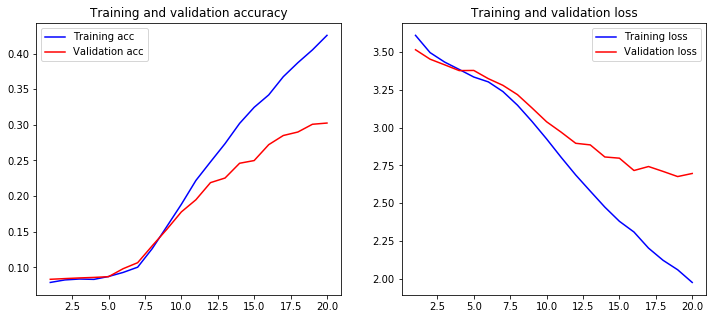

In [14]:
plot_history(history)